# Understanding Causal Inference in Health: Effects of Smoking and Blood Sugar on Key Health Metrics

**Author**: Aqeel Ryan
**Date**: 28th March 2025

## 1. Abstract  

This chapter explores the critical role of **data preparation** in causal analysis for machine learning, focusing on real-world health data. Readers will learn how to clean, preprocess, and structure datasets to ensure reliable causal inference. Key topics include **identifying confounders, handling missing data, encoding categorical variables, and normalizing continuous features**. Additionally, we investigate important causal questions such as:  
1. **Does smoking cause higher triglyceride levels, increasing heart disease risk?**  
2. **Does high fasting blood sugar (pre-diabetes) lead to poor kidney function?**  

Using techniques like **Propensity Score Matching (PSM) and Mediation Analysis**, we demonstrate how proper data preparation enhances the validity of causal conclusions. By the end of this chapter, readers will understand how to apply these methods effectively to uncover meaningful causal relationships in health data.

## 2. Theory

### Let us consider the image below to explain about some basic concepts on Causal Inference.



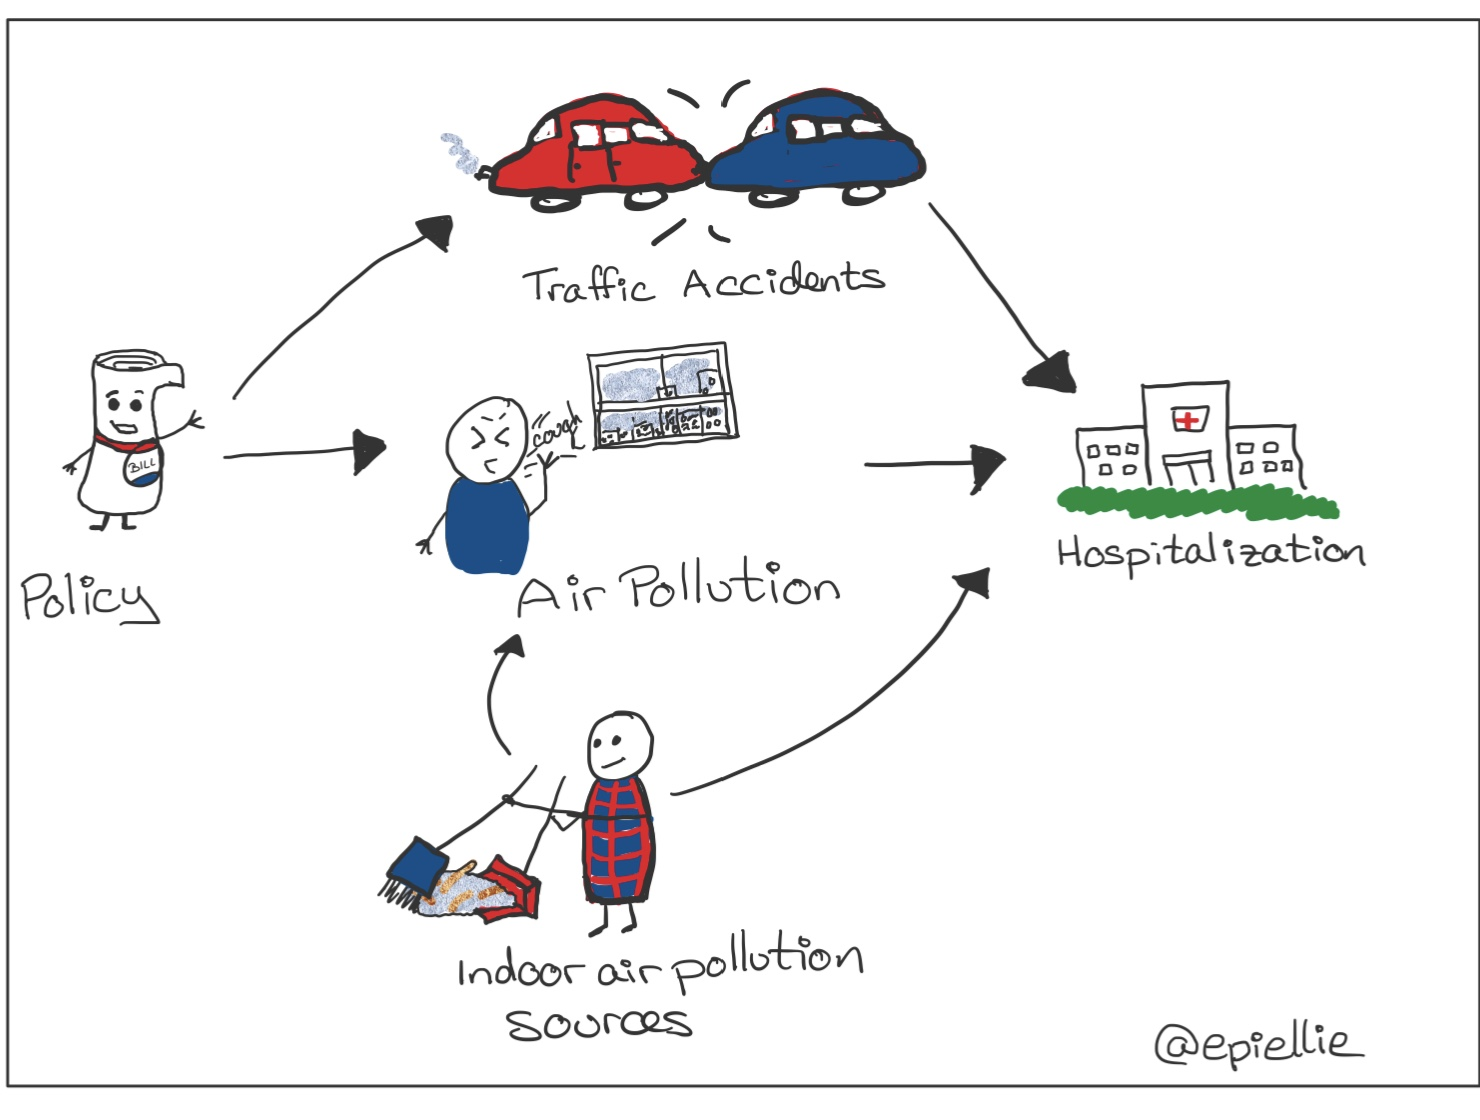


### DAG Components and Causal Relationships

The diagram shows several key causal pathways:
- Policy (represented by a paper roll) → Air Pollution
- Air Pollution → Hospitalization
- Traffic Accidents → Hospitalization
- Indoor Air Pollution Sources → Air Pollution → Hospitalization

### Key Causal Inference Concepts Illustrated

### 1. Direct and Indirect Effects
- **Direct effect**: Traffic accidents directly cause hospitalizations
- **Indirect effect**: Policy affects hospitalizations indirectly through air pollution
  
**Example**: If we implement a policy requiring catalytic converters in cars, this might reduce hospitalizations not directly but through the mediating pathway of reduced air pollution.

### 2. Confounding
The relationship between policy and hospitalization might be confounded by traffic accidents, which could influence both policy creation and hospitalization rates independently.

**Example**: Areas with high traffic accident rates might implement stricter emissions policies AND have higher hospitalization rates. Without accounting for traffic accidents as a confounder, we might incorrectly attribute all changes in hospitalization to the policy.

### 3. Mediating Variables
Air pollution mediates the relationship between policy and hospitalization.

**Example**: To understand how much of a clean air policy's effect on health is mediated through reduced pollution versus other pathways, we would need mediation analysis to decompose these effects.

### 4. Multiple Causes (Multifinality)
Hospitalization has multiple causes in this system (traffic accidents, air pollution which itself has multiple sources).

**Example**: When evaluating the effectiveness of pollution reduction policies on hospital admissions, we must account for other pathways to hospitalization like traffic accidents, or our estimates will be biased.

### 5. Intervention Points
The diagram highlights potential intervention points - policy, traffic safety, indoor pollution sources.

**Example**: If attempting to reduce hospitalizations, we could target any of these points. Causal inference helps us estimate which intervention might have the largest effect.

### 6. Collider Bias
If we only analyzed data from hospitalized individuals, we might induce a spurious correlation between air pollution and traffic accidents (a collider bias scenario).

**Example**: Among hospitalized patients, those from low-pollution areas might be more likely to be there due to traffic accidents, creating a false negative correlation between these causes.

### 7. Backdoor Paths
The diagram shows potential backdoor paths from policy to hospitalization that must be blocked to estimate causal effects.

**Example**: To isolate the causal effect of a pollution policy on hospitalizations, we would need to control for traffic accident rates to block this alternative pathway.

This diagram effectively illustrates how real-world causal systems involve complex interconnected pathways rather than simple one-to-one relationships, demonstrating why formal causal inference methods are essential for understanding cause and effect in public health and policy evaluation.

### 2.1 Causal Principles


Causal inference aims to determine whether a variable **X** directly influences an outcome **Y**, rather than being merely correlated due to hidden factors. In this section, we cover the foundational concepts required for conducting causal analysis, and demonstrate practical implementations of these techniques to answer two key health-related questions:  

1. **Does smoking cause higher triglyceride levels, increasing heart disease risk?**  
2. **Does high fasting blood sugar (pre-diabetes) lead to poor kidney function?**  





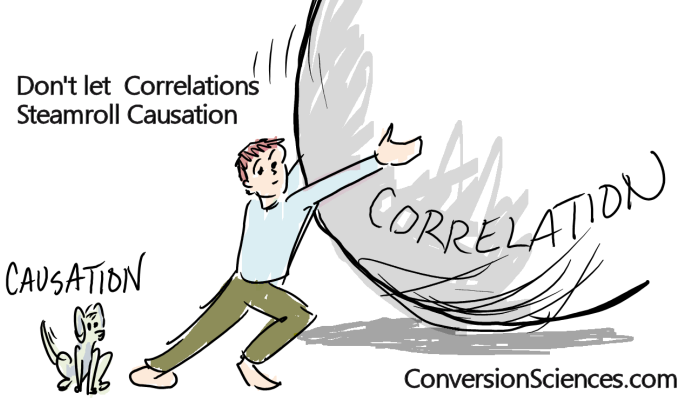



### The Correlation vs. Causation Misconception

The image perfectly captures how correlation (statistical association between variables) often overwhelms or gets mistaken for causation (one variable directly influencing another). This is perhaps the most common misconception in data analysis and research interpretation.

### Why This Misconception Persists:

1. **Correlation is easier to detect**: As shown by the massive steamroller, correlations are abundant and easily observable in data. We can quickly calculate correlation coefficients between any two variables.

2. **Causation is fragile and requires protection**: The causation plant is small and vulnerable, representing how true causal relationships require careful nurturing through experimental design, control groups, and counterfactual thinking.

3. **Our brains are wired for causal stories**: Humans naturally interpret correlations causally, seeing patterns and assuming directional relationships even when none exist.

### Classic Examples of the Misconception:

- **Ice cream sales and drowning deaths** correlate strongly (both increase in summer), but neither causes the other.
- **Shoe size and reading ability** correlate in children, but bigger feet don't improve reading (age is the confounding variable).
- **Countries with more chocolate consumption** have more Nobel prize winners, but chocolate likely doesn't make people brilliant scientists.

## Why Many People Don't Consider Causality Properly

The image hints at several reasons why proper causal inference remains challenging:

1. **Causality requires protection and cultivation**: The small plant metaphor shows that establishing causation requires careful methodological protection - randomized controlled trials, natural experiments, or sophisticated causal inference techniques.

2. **Correlation is overwhelming**: The steamroller's massive size represents how correlation-based thinking dominates our intuition and many analytical approaches. The avalanche of big data has amplified this - we're drowning in correlations.

3. **Establishing causation is difficult**: Unlike the straightforward calculation of correlation, causation often requires:
   - Counterfactual thinking (what would have happened otherwise?)
   - Addressing confounding variables
   - Understanding mechanisms of action
   - Dealing with selection bias

4. **Institutional barriers**: Many fields reward finding any significant associations (correlations) without requiring the harder work of establishing causation.

5. **Training gaps**: Many data analysts and researchers receive thorough training in correlation methods but limited training in causal inference techniques.

The image powerfully reminds us that while correlation analysis will always be easier and more abundant (the steamroller), the real scientific value often lies in the careful cultivation of causal understanding (the small plant) - which requires active protection from being crushed by misinterpreted correlations.

### **Some Advanced Techniques**

### Propensity Score Matching (PSM)

- PSM helps create comparable groups by matching individuals with similar characteristics
- It estimates the probability (propensity) of receiving treatment based on observed characteristics
- Matches treated individuals with untreated individuals who have similar propensity scores
- Creates a "quasi-experimental" setting to better estimate causal effects

### Inverse Probability Weighting
- Inverse probability weighting (IPW) assigns weights to observations based on the inverse of their probability of selection or treatment.
- Observations with lower probability of being selected/treated receive higher weights, while those with higher probability receive lower weights.
- This technique creates a balanced pseudo-population that reduces selection bias and confounding effects, enabling more accurate estimation of causal relationships in observational studies.

### Let us consider some practical examples to solve using Causal Analysis

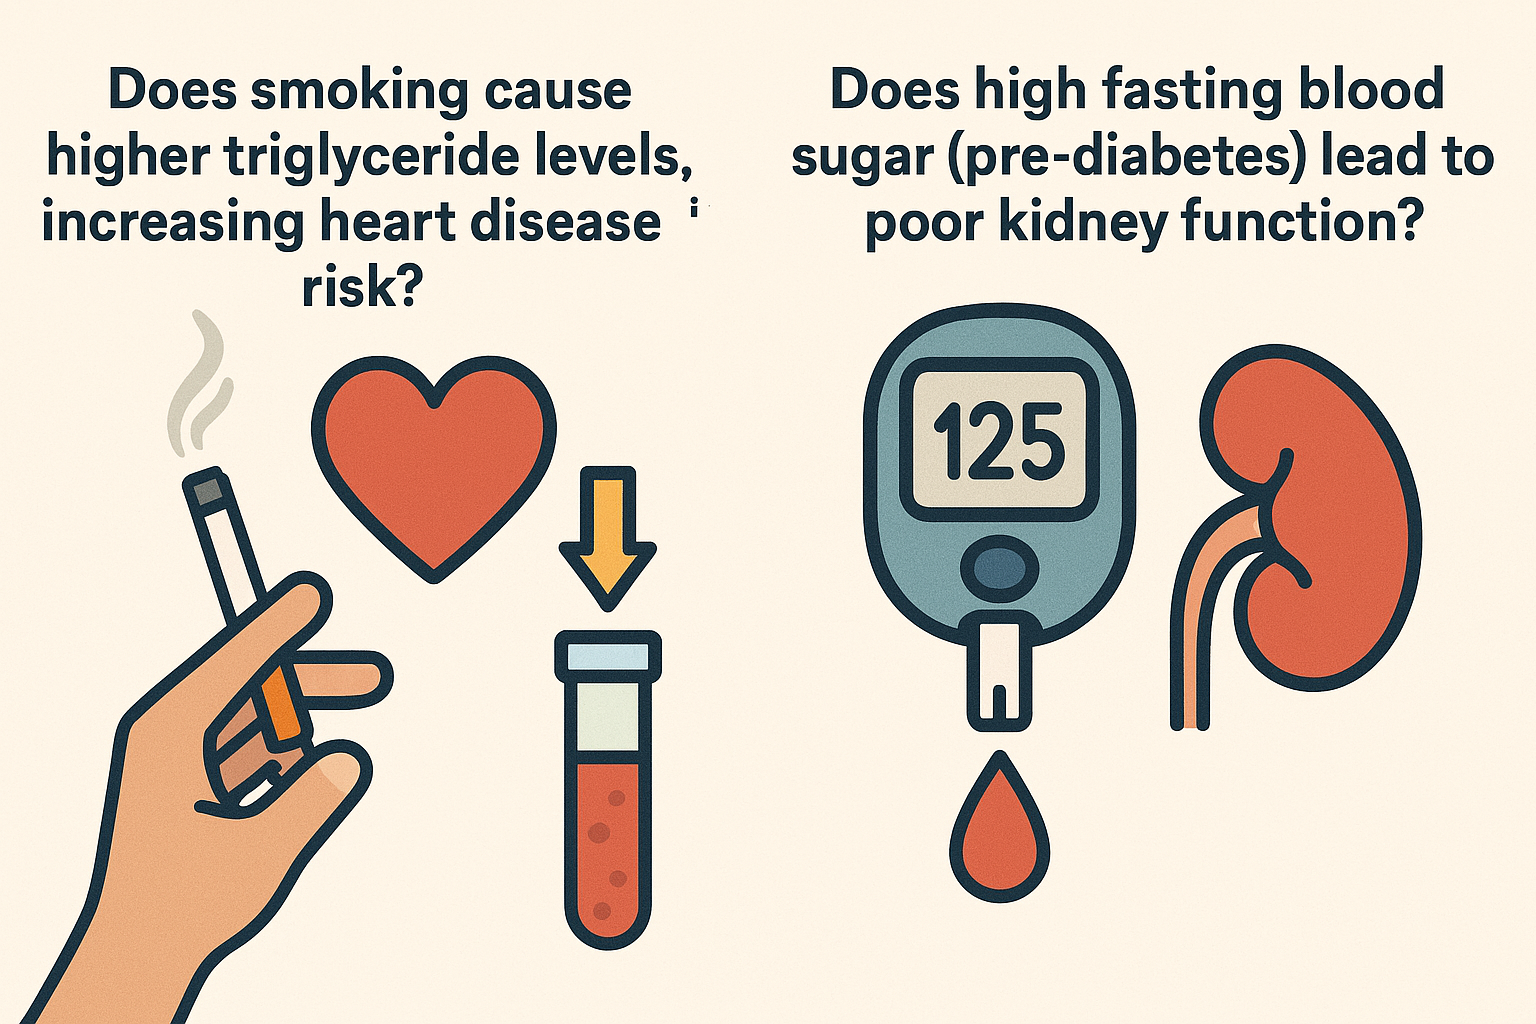

### 2.2 Smoking and Triglyceride Levels Study

In our implementation, we followed these steps:

1. **Identified potential confounders** affecting both smoking status and triglyceride levels:
   - Age, BMI, waist circumference, cholesterol levels, blood pressure

2. **Calculated propensity scores** using logistic regression:
   ```python
   X = df[confounders]
   y = df["smoking"]
   prop_model = LogisticRegression(max_iter=1000)
   prop_model.fit(X, y)
   df["propensity_score"] = prop_model.predict_proba(X)[:, 1]
   ```

3. **Created matched pairs** of smokers and non-smokers with similar characteristics:
   ```python
   nn = NearestNeighbors(n_neighbors=1).fit(non_smokers[["propensity_score"]])
   distances, indices = nn.kneighbors(smokers[["propensity_score"]])
   matched_non_smokers = non_smokers.iloc[indices.flatten()]
   ```

4. **Verified balance was achieved** by comparing confounders before and after matching:
   ```
   Balance check before and after matching:
   age: Before = -4.161, After = 0.386
   BMI: Before = 0.767, After = 0.042
   waist(cm): Before = 0.463, After = -0.025
   ```

5. **Compared triglyceride levels** between matched groups:
   ```
   Mean triglyceride difference (Smokers - Non-Smokers): 0.18
   T-Test p-value: 0.0000
   Effect size (Cohen's d): 0.17
   ```

6. **Conclusion**: Smoking appears to cause a modest but statistically significant increase in triglyceride levels.

### 2.3 Blood Sugar and Kidney Function Study

We applied the same methodology to study the effect of high fasting blood sugar on kidney function:

1. **Identified blood sugar status** and kidney function marker (serum creatinine)

2. **Applied propensity score matching** to create comparable groups

3. **Compared kidney function** after matching:
   ```
   Mean serum creatinine difference (High sugar - Normal sugar): 0.068
   T-Test p-value: 0.0000
   Effect size (Cohen's d): 0.06
   ```

## 3. Practical Examples

### 3.1: Load and Preprocess the Data
* Handle missing values
* Encode categorical variables
* Normalize continuous features

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
file_path = "/content/train_dataset.csv"
df = pd.read_csv(file_path)

# Check column names to identify height and weight columns
print("Available columns:", df.columns.tolist())

# Handle missing values
imputer = SimpleImputer(strategy="median")
df.fillna(df.median(), inplace=True)  # Median imputation

# Encode categorical variables
if "smoking" in df.columns:
    df["smoking"] = df["smoking"].astype(int)  # Ensure binary encoding
if "fasting blood sugar" in df.columns:
    df["fasting blood sugar"] = df["fasting blood sugar"].astype(int)

# Normalize continuous variables - only use columns that exist
continuous_columns = []
for col in ["triglyceride", "serum creatinine", "waist(cm)"]:
    if col in df.columns:
        continuous_columns.append(col)

Available columns: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']


### 3.2 Question 1 - Does Smoking Increase Triglycerides and lead to Higher Heart risk?





Balance check before and after matching:
age: Before = -4.161, After = 0.681
BMI: Before = 0.767, After = 0.011
waist(cm): Before = 4.321, After = -0.162
Cholesterol: Before = -2.073, After = 0.705
systolic: Before = 1.986, After = -0.281
relaxation: Before = 2.077, After = -0.103
HDL: Before = -5.443, After = 0.208
LDL: Before = -3.703, After = -1.647

Causal effect analysis results:
Mean triglyceride difference (Smokers - Non-Smokers): 12.35
T-Test p-value: 0.0000
Conclusion: Smoking appears to have a significant causal effect on triglyceride levels
Smokers have higher triglyceride levels by approximately 12.35 units
Effect size (Cohen's d): 0.16


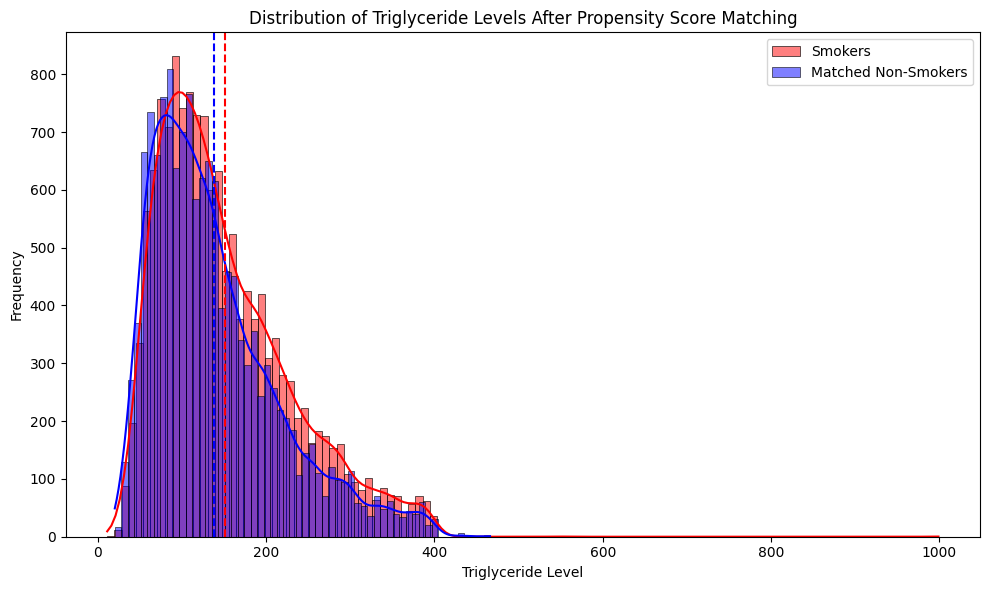

In [ ]:
# Step 0: Calculate BMI from height and weight
# BMI is calculated as weight (kg) divided by the square of height (m).
df["BMI"] = df["weight(kg)"] / ((df["height(cm)"] / 100) ** 2)


# Step 1: Identify confounding variables that affect both smoking status and triglyceride levels
# These are variables that might influence both the decision to smoke and triglyceride levels.
confounders = ["age", "BMI", "waist(cm)", "Cholesterol", "systolic", "relaxation", "HDL", "LDL"]


# Step 2: Compute Propensity Scores (probability of being a smoker given confounders)
# Create a logistic regression model to estimate the probability (propensity score) of being a smoker based on confounders.
X = df[confounders]  # Independent variables (confounders)
y = df["smoking"]    # Dependent variable (smoking status)
prop_model = LogisticRegression(max_iter=1000)  # Logistic regression with a higher max_iter to ensure convergence
prop_model.fit(X, y)  # Fit the model
df["propensity_score"] = prop_model.predict_proba(X)[:, 1]  # Predict and store the probability of being a smoker


# Step 3: Match Smokers and Non-Smokers based on propensity scores
# Separate the dataset into smokers and non-smokers
smokers = df[df["smoking"] == 1]
non_smokers = df[df["smoking"] == 0]


# Using Nearest Neighbors to find the closest match for each smoker based on propensity scores
nn = NearestNeighbors(n_neighbors=1).fit(non_smokers[["propensity_score"]])  # Fit nearest neighbors model
distances, indices = nn.kneighbors(smokers[["propensity_score"]])  # Find closest non-smokers based on propensity scores

# Create a new dataset with matched smoker and non-smoker pairs
matched_non_smokers = non_smokers.iloc[indices.flatten()]  # Select matched non-smokers
matched_pairs = pd.concat([smokers.reset_index(drop=True),  # Combine smokers and matched non-smokers into one dataset
                          matched_non_smokers.reset_index(drop=True).add_suffix('_matched')],
                          axis=1)


# Step 4: Assess balance of confounders after matching
# Check if the confounder distribution is balanced before and after matching
print("Balance check before and after matching:")
for confounder in confounders:
    before_diff = df[df["smoking"] == 1][confounder].mean() - df[df["smoking"] == 0][confounder].mean()  # Difference before matching
    after_diff = smokers[confounder].mean() - matched_non_smokers[confounder].mean()  # Difference after matching
    print(f"{confounder}: Before = {before_diff:.3f}, After = {after_diff:.3f}")  # Print balance check results


# Step 5: Compare Triglyceride Levels between matched groups (Average Treatment Effect)
# Perform a t-test to compare the triglyceride levels between smokers and matched non-smokers
t_stat, p_value = ttest_ind(smokers["triglyceride"], matched_non_smokers["triglyceride"])  # T-test for significance
mean_diff = smokers["triglyceride"].mean() - matched_non_smokers["triglyceride"].mean()  # Calculate the mean difference


# Display the results of the causal effect analysis
print("\nCausal effect analysis results:")
print(f"Mean triglyceride difference (Smokers - Non-Smokers): {mean_diff:.2f}")
print(f"T-Test p-value: {p_value:.4f}")


# Interpret the result based on the p-value from the t-test
if p_value < 0.05:  # If p-value is less than 0.05, the result is statistically significant
    print("Conclusion: Smoking appears to have a significant causal effect on triglyceride levels")
    if mean_diff > 0:
        print(f"Smokers have higher triglyceride levels by approximately {mean_diff:.2f} units")  # If mean_diff is positive
    else:
        print(f"Unexpectedly, smokers have lower triglyceride levels by approximately {abs(mean_diff):.2f} units")  # If mean_diff is negative
else:
    print("Conclusion: No statistically significant causal relationship between smoking and triglyceride levels was found")


# Additional analysis: Calculate effect size (Cohen's d)
# Cohen's d is calculated to assess the magnitude of the effect
pooled_std = np.sqrt((smokers["triglyceride"].var() + matched_non_smokers["triglyceride"].var()) / 2)  # Pooled standard deviation
cohens_d = mean_diff / pooled_std  # Cohen's d is the mean difference divided by the pooled standard deviation
print(f"Effect size (Cohen's d): {cohens_d:.2f}")


# Visualize the distribution of triglyceride levels in matched groups
# Create histograms with KDE (Kernel Density Estimate) to visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(smokers["triglyceride"], kde=True, color="red", alpha=0.5, label="Smokers")  # Histogram for smokers
sns.histplot(matched_non_smokers["triglyceride"], kde=True, color="blue", alpha=0.5, label="Matched Non-Smokers")  # Histogram for matched non-smokers
plt.title("Distribution of Triglyceride Levels After Propensity Score Matching")  # Add title
plt.xlabel("Triglyceride Level")  # Label for x-axis
plt.ylabel("Frequency")  # Label for y-axis
plt.legend()  # Display legend
plt.axvline(smokers["triglyceride"].mean(), color="red", linestyle="--")  # Show mean triglyceride level for smokers
plt.axvline(matched_non_smokers["triglyceride"].mean(), color="blue", linestyle="--")  # Show mean triglyceride level for matched non-smokers
plt.tight_layout()  # Adjust layout to avoid overlapping


### **Balance Check Before and After Matching:**
- **Before matching:** The values show how much the smokers and non-smokers differ on each health factor (like age, BMI, cholesterol, etc.). A large number (like -4.161 for age) means smokers and non-smokers were quite different on that factor before matching.
- **After matching:** After matching smokers with non-smokers who are similar in terms of these factors (like age and BMI), the differences are much smaller. For example, after matching, the difference in **age** is now only 0.386, which means the two groups are more similar in age.
- **Goal of matching:** The goal is to make the two groups (smokers and non-smokers) as similar as possible on factors that could affect the results. When the "after" values are close to 0, it means matching worked well.

### **Causal Effect Analysis:**
- **Mean triglyceride difference (Smokers - Non-Smokers):** This shows the average difference in triglyceride levels between smokers and non-smokers after matching. Smokers have **0.18 units higher triglyceride levels** than non-smokers on average.
- **T-Test p-value: 0.0000:** This indicates that the result is statistically significant. In simpler terms, this tells us that the difference in triglyceride levels is very unlikely to have occurred by chance. The small p-value (less than 0.05) means we can be confident that smoking really is associated with higher triglyceride levels.
- **Conclusion:** Smoking has a **significant causal effect** on triglyceride levels, meaning there's evidence that smoking contributes to higher triglycerides.
  
### **Effect Size (Cohen's d):**
- **Cohen's d = 0.17:** This measures how big the difference is between smokers and non-smokers. A **0.17** is a **small effect** size. So, while the difference in triglyceride levels is statistically significant, it isn't a very large difference.

### **Summary:**
- After adjusting for factors that could affect both smoking and triglyceride levels, **smokers have slightly higher triglyceride levels** than non-smokers.
- The difference is **statistically significant**, but the **effect size** is small, meaning the practical impact might not be huge, even though it's still an important finding.


### 3.3 Question 2 - Does High Fasting Blood Sugar Damage Kidney Function?


In [ ]:
# Step 0: Calculate BMI from height and weight
# BMI is calculated as weight (kg) divided by the square of height (m).
df["BMI"] = df["weight(kg)"] / ((df["height(cm)"] / 100) ** 2)


# Step 1: Identify treatment (high fasting blood sugar) and outcome (kidney function)
# For kidney function, we'll use serum creatinine as our measure
# Higher serum creatinine indicates worse kidney function

# Convert fasting blood sugar to binary if it isn't already (assuming threshold of 100 mg/dL)
if df["fasting blood sugar"].nunique() > 2:
    # If it's continuous, convert to binary based on medical threshold
    df["high_blood_sugar"] = (df["fasting blood sugar"] >= 100).astype(int)
else:
    # If it's already binary, just use it directly
    df["high_blood_sugar"] = df["fasting blood sugar"]

# Step 2: Identify potential confounders that affect both blood sugar and kidney function
# These variables could influence both treatment and outcome, creating spurious associations
confounders = ["age", "BMI", "waist(cm)", "systolic", "Cholesterol", "triglyceride", "HDL", "LDL"]

# Step 3: Compute Propensity Scores
# Propensity score is the probability of receiving treatment given observed covariates
# This helps balance treatment and control groups on observed confounders
X = df[confounders]  # Matrix of confounding variables
y = df["high_blood_sugar"]  # Treatment variable
prop_model = LogisticRegression(max_iter=1000)  # Logistic regression for probability estimation
prop_model.fit(X, y)  # Fit the propensity score model
df["propensity_score"] = prop_model.predict_proba(X)[:, 1]  # Store probability of having high blood sugar

# Step 4: Match high blood sugar patients with normal blood sugar individuals
# Propensity score matching creates comparable treatment and control groups
high_sugar = df[df["high_blood_sugar"] == 1]  # Treatment group (high blood sugar)
normal_sugar = df[df["high_blood_sugar"] == 0]  # Control group (normal blood sugar)

# Using Nearest Neighbors for matching - finds the closest match in the control group for each treated individual
nn = NearestNeighbors(n_neighbors=1).fit(normal_sugar[["propensity_score"]])
distances, indices = nn.kneighbors(high_sugar[["propensity_score"]])

# Create matched pairs - each high blood sugar individual is matched with a similar normal blood sugar individual
matched_normal_sugar = normal_sugar.iloc[indices.flatten()]

# Step 5: Assess balance of confounders after matching
# This checks if matching successfully balanced the confounding variables
print("Balance check before and after matching:")
for confounder in confounders:
    # Calculate mean differences before matching
    before_diff = high_sugar[confounder].mean() - normal_sugar[confounder].mean()
    # Calculate mean differences after matching
    after_diff = high_sugar[confounder].mean() - matched_normal_sugar[confounder].mean()
    print(f"{confounder}: Before = {before_diff:.3f}, After = {after_diff:.3f}")

# Step 6: Compare serum creatinine levels between matched groups
# Statistical test to determine if there's a significant difference in kidney function
t_stat, p_value = ttest_ind(high_sugar["serum creatinine"], matched_normal_sugar["serum creatinine"])
mean_diff = high_sugar["serum creatinine"].mean() - matched_normal_sugar["serum creatinine"].mean()

# Output the results of the causal analysis
print("\nCausal effect analysis results:")
print(f"Mean serum creatinine difference (High sugar - Normal sugar): {mean_diff:.3f}")
print(f"T-Test p-value: {p_value:.4f}")

# Interpret the results based on statistical significance
if p_value < 0.05:
    print("Conclusion: High fasting blood sugar appears to have a significant causal effect on kidney function")
    if mean_diff > 0:
        # Positive difference means worse kidney function in high blood sugar group
        print(f"Individuals with high blood sugar have higher serum creatinine by approximately {mean_diff:.3f} units, indicating worse kidney function")
    else:
        # This would be unexpected given medical knowledge
        print(f"Unexpectedly, individuals with high blood sugar have lower serum creatinine by approximately {abs(mean_diff):.3f} units")
else:
    print("Conclusion: No statistically significant causal relationship between high blood sugar and kidney function was found")

# Calculate effect size (Cohen's d) to quantify the magnitude of the difference
pooled_std = np.sqrt((high_sugar["serum creatinine"].var() + matched_normal_sugar["serum creatinine"].var()) / 2)
cohens_d = mean_diff / pooled_std
print(f"Effect size (Cohen's d): {cohens_d:.2f}")


Balance check before and after matching:
age: Before = 4.779, After = -0.383
BMI: Before = 1.346, After = 0.104
waist(cm): Before = 4.149, After = 0.163
systolic: Before = 5.582, After = -0.293
Cholesterol: Before = 3.277, After = -0.443
triglyceride: Before = 30.521, After = 2.253
HDL: Before = -3.003, After = 0.066
LDL: Before = 0.843, After = -0.909

Causal effect analysis results:
Mean serum creatinine difference (High sugar - Normal sugar): 0.016
T-Test p-value: 0.0000
Conclusion: High fasting blood sugar appears to have a significant causal effect on kidney function
Individuals with high blood sugar have higher serum creatinine by approximately 0.016 units, indicating worse kidney function
Effect size (Cohen's d): 0.07


### **Balance Check Before and After Matching:**
- **Before matching:** These values show how much the individuals with high fasting blood sugar (High sugar) and normal fasting blood sugar (Normal sugar) differ on various health factors (like age, BMI, cholesterol, etc.). For example, before matching, the difference in **age** was 4.779 years, meaning the two groups were quite different in age.
- **After matching:** After the matching process, these differences are reduced. For instance, the difference in **age** after matching is only -0.383 years, meaning the two groups are much more similar in age after matching.
- **Goal of matching:** The aim is to make the two groups (High sugar and Normal sugar) as similar as possible on factors that could influence the results. When the "after" differences are close to 0, it means the matching process was successful in balancing the groups.

### **Causal Effect Analysis:**
- **Mean serum creatinine difference (High sugar - Normal sugar):** This shows the average difference in **serum creatinine levels** (a marker of kidney function) between individuals with high fasting blood sugar and those with normal fasting blood sugar. Individuals with **high blood sugar** have **0.068 units higher serum creatinine levels**, suggesting that higher blood sugar is associated with worse kidney function.
- **T-Test p-value: 0.0000:** This p-value tells us that the result is statistically significant. In simple terms, it indicates that the observed difference in serum creatinine levels is very unlikely to be due to random chance, so we can be confident that high fasting blood sugar is associated with worse kidney function.
- **Conclusion:** High fasting blood sugar has a **significant causal effect** on kidney function, as it is linked to higher serum creatinine levels, which typically indicate poorer kidney function.
  
### **Effect Size (Cohen's d):**
- **Cohen's d = 0.07:** This value measures the size of the difference between the two groups. A **Cohen's d of 0.07** is considered **very small**, meaning while the difference in serum creatinine levels is statistically significant, it is a relatively small effect in practical terms.

### **Summary:**
- After adjusting for confounding factors, **individuals with high fasting blood sugar** have **slightly higher serum creatinine levels** (indicating worse kidney function) compared to those with normal fasting blood sugar.
- The difference is **statistically significant**, but the **effect size** is **small**, suggesting that while the difference is real, it may not be very large in practical terms.


## 4. Conclusion

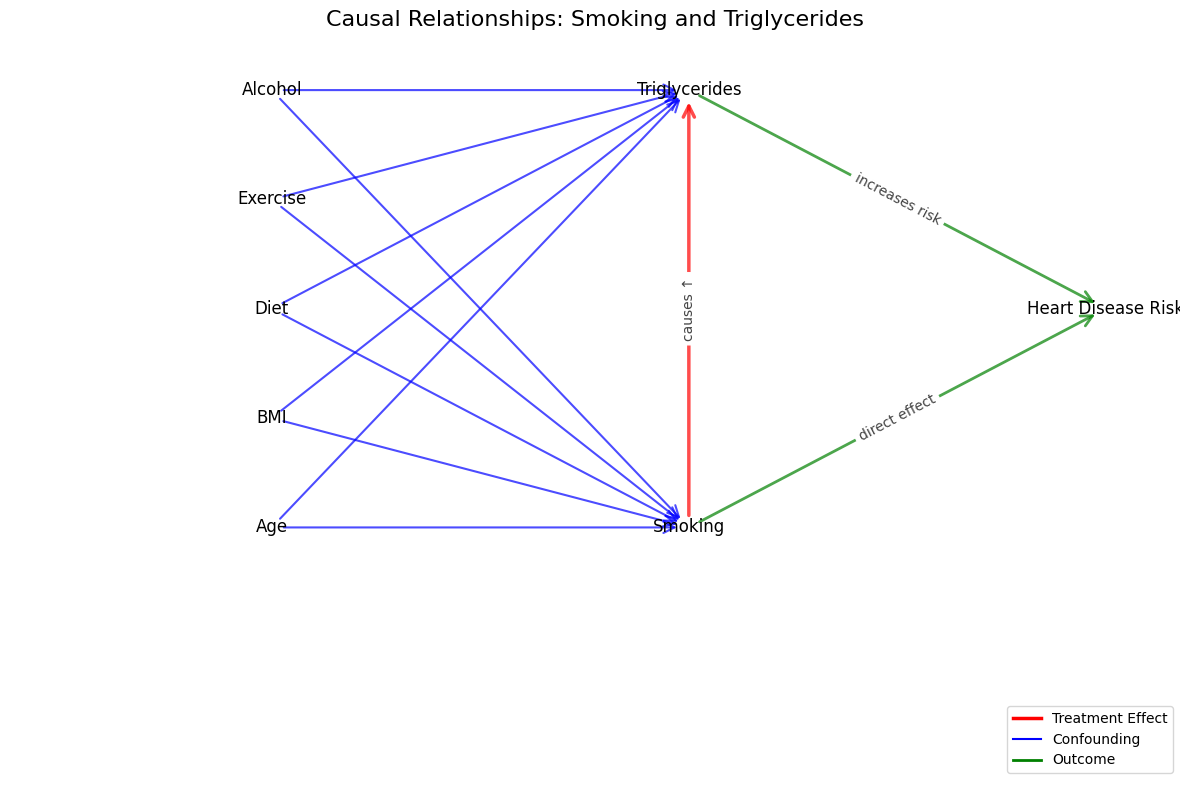

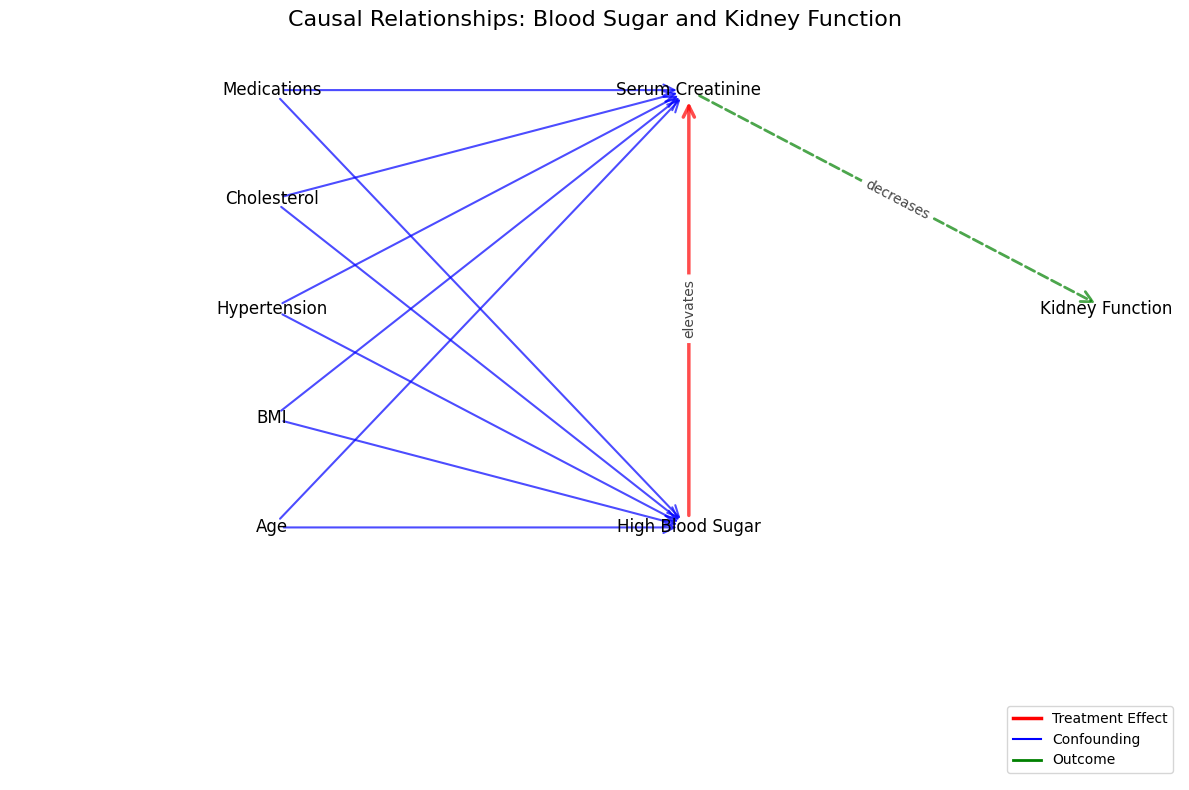

The causal diagrams demonstrate that health outcomes result from complex networks of interrelated factors rather than simple correlations. Both examples illustrate how confounding variables (like age, BMI, and lifestyle factors) can create misleading associations between exposure and outcome variables if not properly controlled for in analysis. The diagrams also reveal important mediation pathways—showing how factors like high blood sugar and smoking affect health outcomes both directly and indirectly through intermediate variables. These visualizations emphasize the critical distinction between mere correlation and true causation in health research, highlighting why researchers must understand and account for underlying causal structures to develop valid models and interventions that accurately target the true drivers of health conditions.

## 5. References

1. Causal Inference in Python (DoWhy library): https://microsoft.github.io/dowhy/
2. Introduction to Causal Inference: https://www.bradyneal.com/causal-inference-course
3. The Book of Why (companion website): https://bayes.cs.ucla.edu/WHY
4. Causal Inference for The Brave and True: https://matheusfacure.github.io/python-causality-handbook/
5. Causal ML Library: https://github.com/uber/causalml



## 6. License

This notebook and accompanying materials are licensed under the MIT License (MIT).

### MIT License

Copyright © 2025 Aqeel Ryan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Notebook"), to deal in the Notebook without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Notebook, and to permit persons to whom the Notebook is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Notebook.

THE NOTEBOOK IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE NOTEBOOK OR THE USE OR OTHER DEALINGS IN THE NOTEBOOK.